In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import string
import os
import glob
import matplotlib.pyplot as plt
import plotly.express as px

## Load and plot data from AIRDOS

In [81]:
fto = '/storage/aircraft/airdos/2019/TS/A012/20190903-20191004/DATALOG.TXT' #  File to Open

print (fto)

l=[]
l.extend(range(0,258))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)
df = df.reset_index(drop=True)

/storage/aircraft/airdos/2019/TS/A012/20190903-20191004/DATALOG.TXT


Text(0, 0.5, 'Counts per 10 seconds [-]')

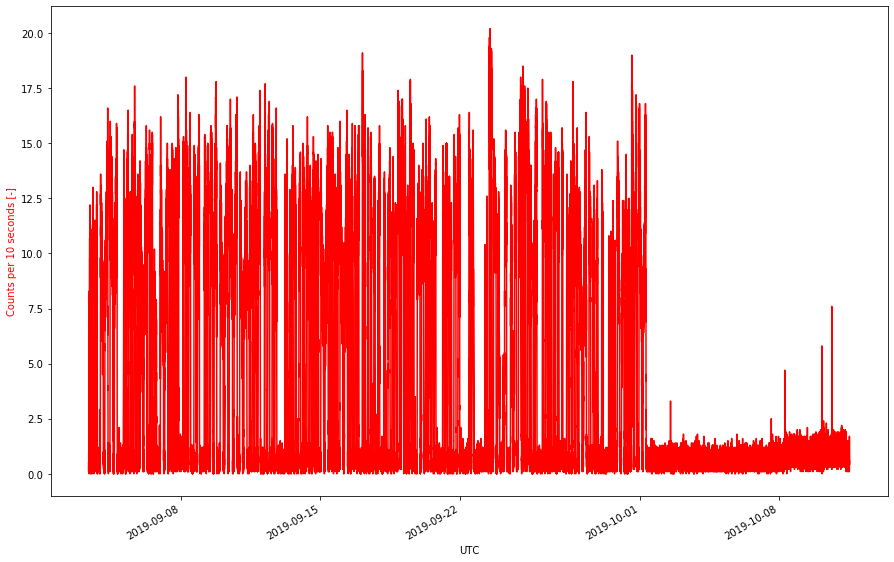

In [83]:
SWITCH_ON_AIRDOS = '2019-09-03 9:10'

plt.figure(figsize=(15,10))

rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

rc['sum'] = rc[range(7,255)].sum(axis=1)

rc['time'] = pd.to_datetime(pd.to_datetime(SWITCH_ON_AIRDOS) + pd.to_timedelta(rc[2], unit='s'))
rc = rc.set_index(['time'])

WINDOW = 10
rc['sum'] = rc['sum'].rolling(WINDOW).mean()

rc['sum'].plot(color='r')
#plt.ylim([0,20])
plt.xlabel('UTC')
plt.ylabel('Counts per 10 seconds [-]', color='red')

# Load and plot telemetry data

In [71]:
fto = glob.iglob("/storage/aircraft/airdos/2019/TS/A012/20190903-20191004/*/*.csv") # generator, search immediate subdirectories 
tele = pd.DataFrame()
for f in fto:
    #print(f)
    tele = pd.concat([tele, pd.read_csv(f)])
tele

Timestamp                   UTC Callsign             Position  Altitude  \
0    1569493643  2019-09-26T10:27:23Z   CSA6KG  50.975098,15.102415     30200   
1    1569493662  2019-09-26T10:27:42Z   CSA6KG  51.003616,15.138046     30825   
2    1569493671  2019-09-26T10:27:51Z   CSA6KG  51.022064,15.152967     31200   
3    1569493677  2019-09-26T10:27:57Z   CSA6KG  51.033279,15.160464     31400   
4    1569493685  2019-09-26T10:28:05Z   CSA6KG   51.04467,15.167847     31600   
..          ...                   ...      ...                  ...       ...   
240  1570048095  2019-10-02T20:28:15Z   CSA3CZ  50.103504,14.266397         0   
241  1570048101  2019-10-02T20:28:21Z   CSA3CZ  50.103367,14.266723         0   
242  1570048110  2019-10-02T20:28:30Z   CSA3CZ  50.103436,14.267138         0   
243  1570048119  2019-10-02T20:28:39Z   CSA3CZ  50.103638,14.267344         0   
244  1570048152  2019-10-02T20:29:12Z   CSA3CZ  50.103592,14.266211         0   

     Speed  Direction  
0      445         43  
1      436         31  
2      432         25  
3      430         21  
4      428         19  
..     ...        ...  
240     26        123  
241     20        123  
242     19         22  
243     12         30  
244      0         38  

[20548 rows x 7 columns]

Text(0, 0.5, 'Altitude a.s.l. [ft]')

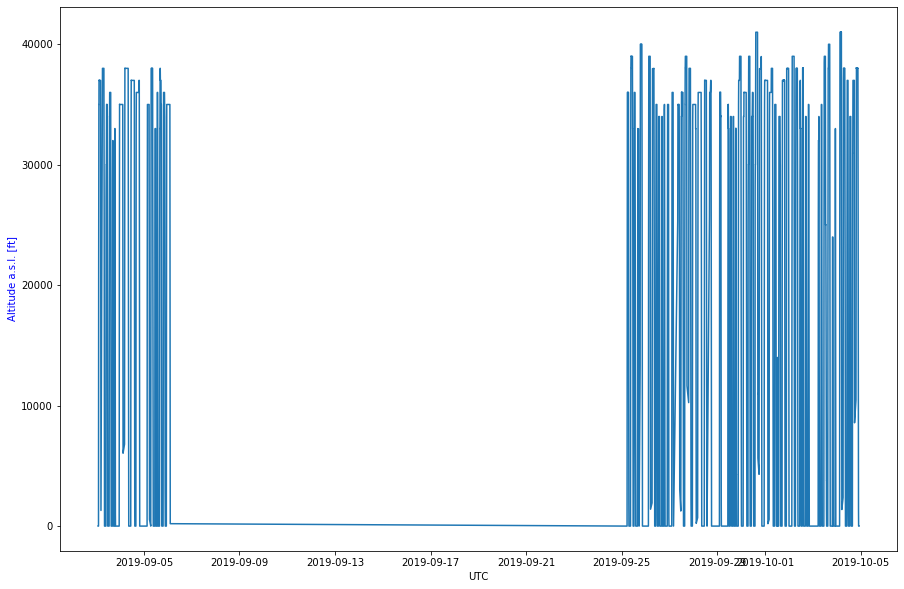

In [91]:
plt.figure(figsize=(15,10))

tele['time'] = pd.to_datetime(tele['UTC'], format='%Y-%m-%dT%H:%M:%SZ')
tele.set_index('time', inplace=True)
tele.sort_index(inplace=True)
plt.plot(tele['Altitude'])
plt.xlabel('UTC')
plt.ylabel('Altitude a.s.l. [ft]', color='blue')

# Combine AIRDOS and telemetry data

Text(0, 0.5, 'Counts per 10 seconds [-]')

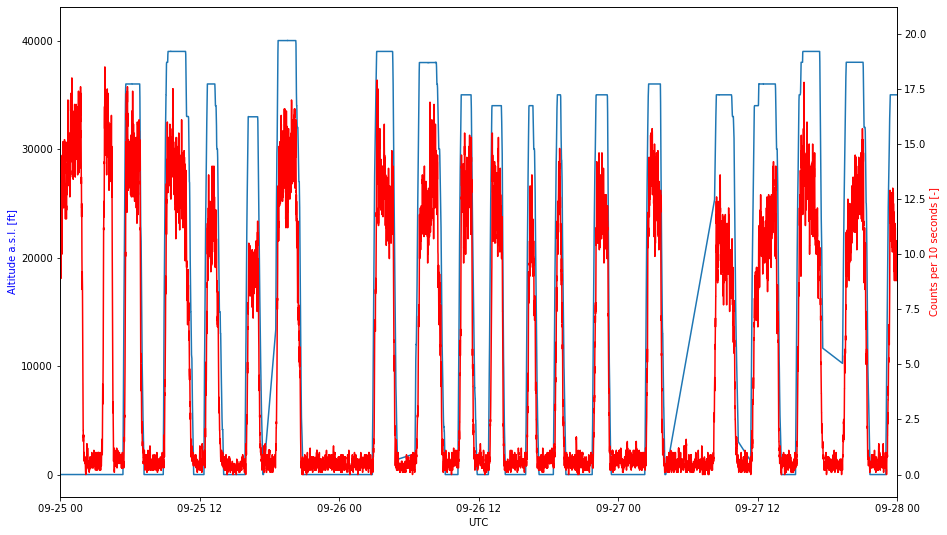

In [93]:
plt.figure(figsize=(15,10))

plt.plot(tele['Altitude'])
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
plt.xlim(pd.Timestamp('2019-09-25'),pd.Timestamp('2019-09-28'))
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')

plt.twinx()

rc['sum'].plot(color='r')
plt.ylabel('Counts per 10 seconds [-]', color='red')


# Plot with plotly

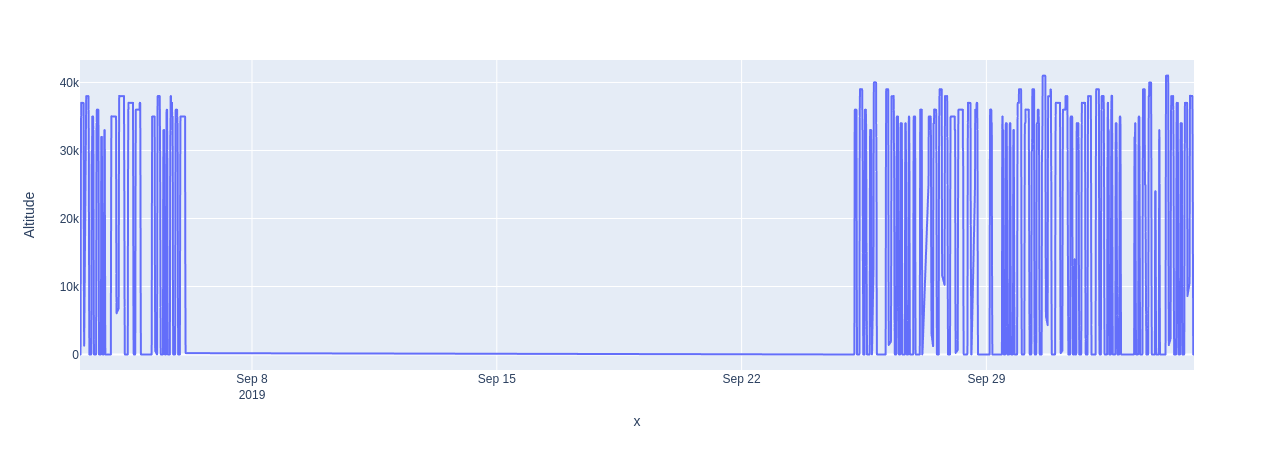

In [116]:
fig = px.line(tele, x=tele.index, y="Altitude")
fig.show()

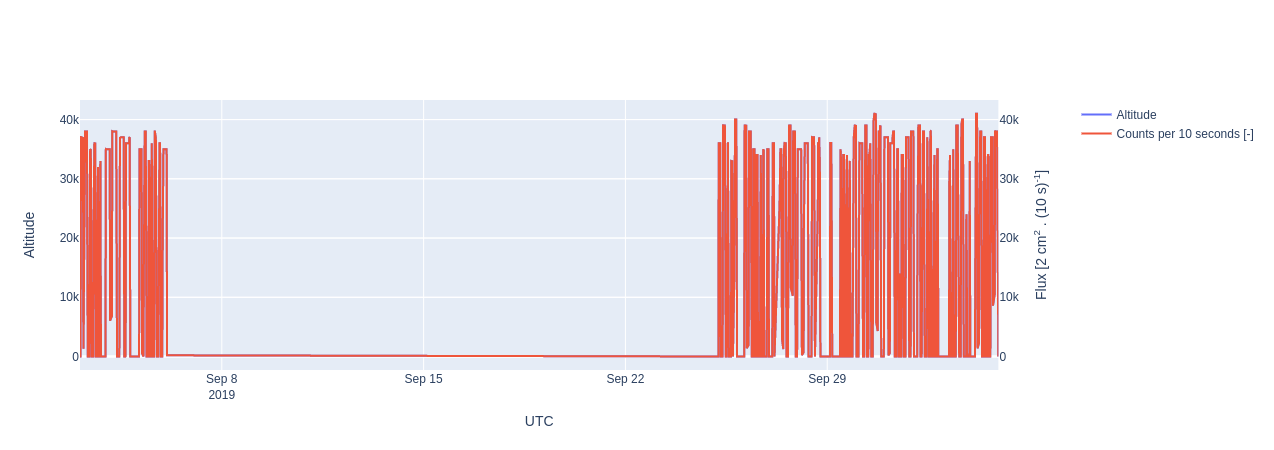

In [114]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=tele.index, y=tele.Altitude, name="Altitude"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=rc.index, y=rc, name="Counts per 10 seconds [-]"),
    secondary_y=True,
)



# Set x-axis title
fig.update_xaxes(title_text="UTC")

# Set y-axes titles
fig.update_yaxes(title_text="Altitude", secondary_y=False)
fig.update_yaxes(title_text="Flux [2 cm<sup>2</sup> . (10 s)<sup>-1</sup>]", secondary_y=True)

fig.show()